# Evaluate Heating and Cooling Load requirements according to different building parameters====>

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#For displaying all the columns of the dataframe
pd.pandas.set_option("display.max_columns",None)

In [75]:
df=pd.read_excel("ENB2012_data.xlsx")

In [76]:
df

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


# Here is some Information About Dataset(Source,Data Set and Information,Attribute Information)

Source:

The dataset was created by Angeliki Xifara (angxifara '@' gmail.com, Civil/Structural Engineer) and was processed by Athanasios Tsanas (tsanasthanasis '@' gmail.com, Oxford Centre for Industrial and Applied Mathematics, University of Oxford, UK).


Data Set Information:

Here energy analysis using 12 different building shapes simulated in Ecotect performed. The buildings differ with respect to the glazing area, the glazing area distribution, and the orientation, amongst other parameters. We simulate various settings as functions of the afore-mentioned characteristics to obtain 768 building shapes. The dataset comprises 768 samples and 8 features, aiming to predict two real valued responses. It can also be used as a multi-class classification problem if the response is rounded to the nearest integer.


Attribute Information:

The dataset contains eight attributes (or features, denoted by X1...X8) and two responses (or outcomes, denoted by y1 and y2). The aim is to use the eight features to predict each of the two responses.

Specifically:
X1 Relative Compactness
X2 Surface Area
X3 Wall Area
X4 Roof Area
X5 Overall Height
X6 Orientation
X7 Glazing Area
X8 Glazing Area Distribution
y1 Heating Load
y2 Cooling Load

# Aim Of This Dataset Analysis

The main aim of this dataset analysis is to understand how much heating and cooling load are required according to the 
building parameters like Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,
and Glazing Area Distribution.

# Just a Brief Understanding of Functions of Building Parameter

Relative Compactness:It is a measure of compactness of buildings.More compact the build less will be the empty area inside which needs to heated or cooled.
Roof Area:It is the actual area where heating and cooling would be required inside the building
Glazing Area:It is a proportion of floor area which is covered by windows,glass wall,glass roofs etc since it is exposed to external factors like sun,snow,wind and others this may affect heating and cooling conditions of the buildings.



In [77]:
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


# RENAME ALL THE COLUMNS

In [78]:
df.columns = ['Relative Compactness', 'Surface Area', 'Wall Area', 'Roof Area','Overall Height','Orientation','Glazing Area','Glazing Area Distribution','Heating Load','Cooling Load']

In [79]:
df.columns

Index(['Relative Compactness', 'Surface Area', 'Wall Area', 'Roof Area',
       'Overall Height', 'Orientation', 'Glazing Area',
       'Glazing Area Distribution', 'Heating Load', 'Cooling Load'],
      dtype='object')

In [80]:
df.sample(100)

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
38,0.66,759.5,318.5,220.5,3.5,4,0.00,0,7.10,12.40
169,0.74,686.0,245.0,220.5,3.5,3,0.10,3,10.34,13.36
125,0.71,710.5,269.5,220.5,3.5,3,0.10,2,10.72,14.11
678,0.90,563.5,318.5,122.5,7.0,4,0.40,4,35.40,39.22
374,0.66,759.5,318.5,220.5,3.5,4,0.25,2,12.77,16.22
...,...,...,...,...,...,...,...,...,...,...
120,0.74,686.0,245.0,220.5,3.5,2,0.10,2,10.42,13.39
636,0.82,612.5,318.5,147.0,7.0,2,0.40,3,28.67,32.43
362,0.74,686.0,245.0,220.5,3.5,4,0.25,2,12.16,15.18
597,0.76,661.5,416.5,122.5,7.0,3,0.40,2,40.15,40.40


In [81]:
df.tail()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
763,0.64,784.0,343.0,220.5,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.5,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.5,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.5,3.5,4,0.4,5,16.48,16.61
767,0.62,808.5,367.5,220.5,3.5,5,0.4,5,16.64,16.03


In [82]:
df.shape

(768, 10)

====>>Dataset have 768 rows(samples) and 10 columns (features)

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Relative Compactness       768 non-null    float64
 1   Surface Area               768 non-null    float64
 2   Wall Area                  768 non-null    float64
 3   Roof Area                  768 non-null    float64
 4   Overall Height             768 non-null    float64
 5   Orientation                768 non-null    int64  
 6   Glazing Area               768 non-null    float64
 7   Glazing Area Distribution  768 non-null    int64  
 8   Heating Load               768 non-null    float64
 9   Cooling Load               768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [84]:
df

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


All columns are float type except Glazing Area Distribution.So lets change the datatype of orientation and Glazing Area Distribution from int64 to float64

In [85]:
df['Orientation']=df[ 'Orientation'].astype("float")

In [86]:
df['Orientation']

0      2.0
1      3.0
2      4.0
3      5.0
4      2.0
      ... 
763    5.0
764    2.0
765    3.0
766    4.0
767    5.0
Name: Orientation, Length: 768, dtype: float64

In [87]:
df['Glazing Area Distribution']=df[ 'Glazing Area Distribution'].astype("float")

In [88]:
df['Glazing Area Distribution']

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
763    5.0
764    5.0
765    5.0
766    5.0
767    5.0
Name: Glazing Area Distribution, Length: 768, dtype: float64

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Relative Compactness       768 non-null    float64
 1   Surface Area               768 non-null    float64
 2   Wall Area                  768 non-null    float64
 3   Roof Area                  768 non-null    float64
 4   Overall Height             768 non-null    float64
 5   Orientation                768 non-null    float64
 6   Glazing Area               768 non-null    float64
 7   Glazing Area Distribution  768 non-null    float64
 8   Heating Load               768 non-null    float64
 9   Cooling Load               768 non-null    float64
dtypes: float64(10)
memory usage: 60.1 KB


In [90]:
df.describe(include="all").T

,count,mean,std,min,25%,50%,75%,max
Relative Compactness,768.0,0.764167,0.105777,0.62,0.6825,0.75,0.8300,0.98
Surface Area,768.0,671.708333,88.086116,514.50,606.3750,673.75,741.1250,808.50
Wall Area,768.0,318.500000,43.626481,245.00,294.0000,318.50,343.0000,416.50
Roof Area,768.0,176.604167,45.165950,110.25,140.8750,183.75,220.5000,220.50
Overall Height,768.0,5.250000,1.751140,3.50,3.5000,5.25,7.0000,7.00
Orientation,768.0,3.500000,1.118763,2.00,2.7500,3.50,4.2500,5.00
Glazing Area,768.0,0.234375,0.133221,0.00,0.1000,0.25,0.4000,0.40
Glazing Area Distribution,768.0,2.812500,1.550960,0.00,1.7500,3.00,4.0000,5.00
Heating Load,768.0,22.307195,10.090204,6.01,12.9925,18.95,31.6675,43.10
Cooling Load,768.0,24.587760,9.513306,10.90,15.6200,22.08,33.1325,48.03


# Checking Missing Values in given Dataset

In [91]:
df.isnull().sum()

Relative Compactness         0
Surface Area                 0
Wall Area                    0
Roof Area                    0
Overall Height               0
Orientation                  0
Glazing Area                 0
Glazing Area Distribution    0
Heating Load                 0
Cooling Load                 0
dtype: int64

# Happy====> No Missing Values

So no replacement of missing values are needed.

# Checking Duplicate Values in given Dataset

In [92]:
df.duplicated().sum()

0

# Happy Again====>>No Duplicate Values Also

So no need to handle with duplicate values

# segregate numerical and categorical columns

In [93]:
numerical_columns=df.columns[df.dtypes!='object']
categorical_columns=df.columns[df.dtypes=='object']
print("Numerical columns:",numerical_columns)
print('Categorical Columns:',categorical_columns)

Numerical columns: Index(['Relative Compactness', 'Surface Area', 'Wall Area', 'Roof Area',
       'Overall Height', 'Orientation', 'Glazing Area',
       'Glazing Area Distribution', 'Heating Load', 'Cooling Load'],
      dtype='object')
Categorical Columns: Index([], dtype='object')


# Checking Unique Values

In [94]:
df['Relative Compactness'].unique()

array([0.98, 0.9 , 0.86, 0.82, 0.79, 0.76, 0.74, 0.71, 0.69, 0.66, 0.64,
       0.62])

In [95]:
for i in df.columns:
    print(i,df[i].unique())

Relative Compactness [0.98 0.9  0.86 0.82 0.79 0.76 0.74 0.71 0.69 0.66 0.64 0.62]
Surface Area [514.5 563.5 588.  612.5 637.  661.5 686.  710.5 735.  759.5 784.  808.5]
Wall Area [294.  318.5 343.  416.5 245.  269.5 367.5]
Roof Area [110.25 122.5  147.   220.5 ]
Overall Height [7.  3.5]
Orientation [2. 3. 4. 5.]
Glazing Area [0.   0.1  0.25 0.4 ]
Glazing Area Distribution [0. 1. 2. 3. 4. 5.]
Heating Load [15.55  20.84  21.46  20.71  19.68  19.5   19.95  19.34  18.31  17.05
 17.41  16.95  15.98  28.52  29.9   29.63  28.75  24.77  23.93   6.07
  6.05   6.01   6.04   6.37   6.4    6.366  6.85   6.79   6.77   6.81
  7.18   7.1   10.85  10.54  10.77  10.56   8.6    8.49   8.45   8.5
 24.58  24.63  24.59  29.03  29.87  29.14  28.09  26.28  26.91  26.37
 25.27  23.53  24.03  23.54  22.58  35.56  37.12  36.9   35.94  32.96
 32.12  32.94  32.21  10.36  10.43  10.39  10.71  10.8   10.7   10.75
 11.11  11.13  11.09  11.16  11.68  11.69  11.7   15.41  15.2   15.42
 15.21  12.96  12.97  12.93  13.

# No such Unique values present in columns which would affect the Profile Based Analysis,Stats based Analysis and Graph based Analysis so no need to replace unique values.

# Lets understand the affects or effects of features on Energy Efficiency one by one=====>>

# 1.Relative Compactness====>


<AxesSubplot: xlabel='Relative Compactness', ylabel='Heating Load'>

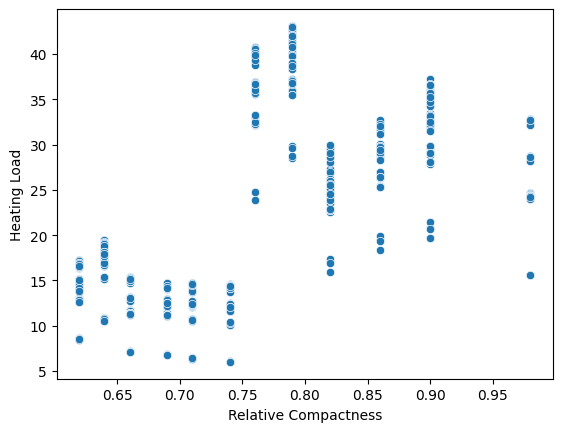

In [96]:
sns.scatterplot(data=df, x="Relative Compactness", y="Heating Load")

<AxesSubplot: xlabel='Relative Compactness', ylabel='Heating Load'>

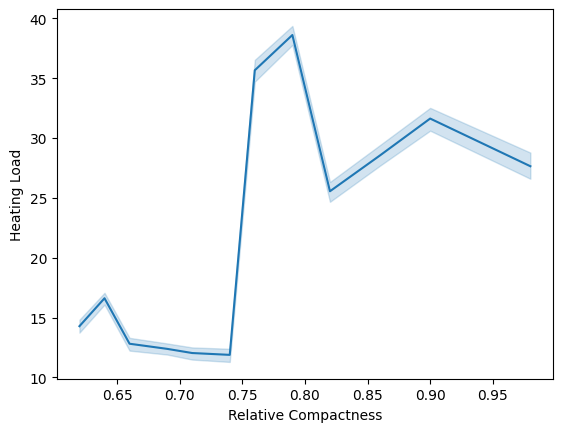

In [97]:
sns.lineplot(data=df, x="Relative Compactness", y="Heating Load")

<AxesSubplot: xlabel='Relative Compactness', ylabel='Cooling Load'>

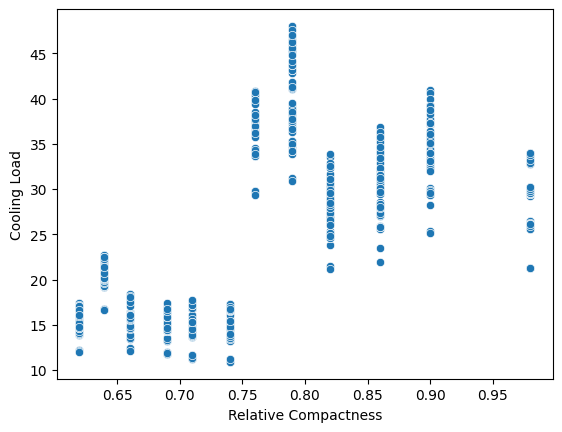

In [98]:
sns.scatterplot(data=df, x="Relative Compactness", y="Cooling Load")

<AxesSubplot: xlabel='Relative Compactness', ylabel='Cooling Load'>

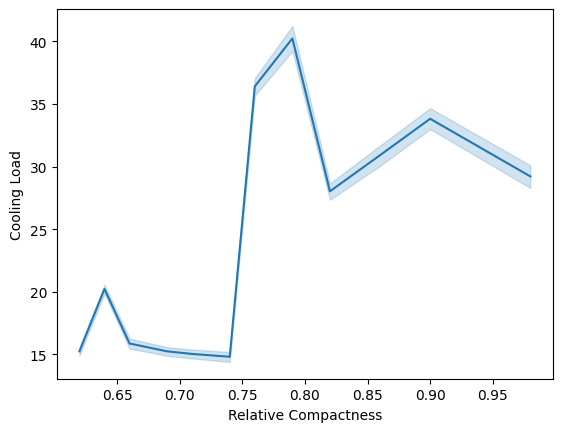

In [99]:
sns.lineplot(data=df, x="Relative Compactness", y="Cooling Load")

# It can be observed that when the Relative Copactness is less than 0.75 Heating and Cooling Load is less than 25.

# Conclusion==>So we can conclude than less compact building would be more energy efficient.

# 2.Surface Area====>

<AxesSubplot: xlabel='Surface Area', ylabel='Heating Load'>

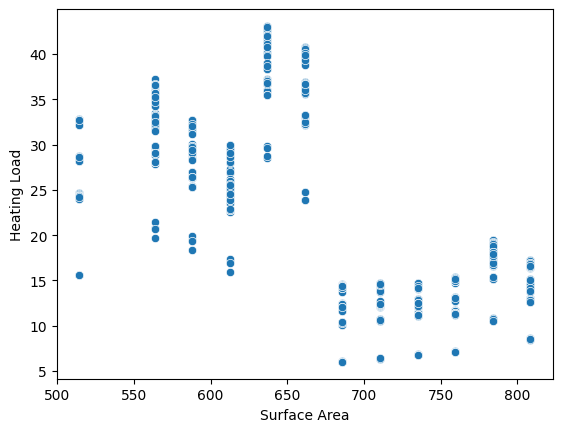

In [100]:
sns.scatterplot(data=df, x="Surface Area", y="Heating Load")

<AxesSubplot: xlabel='Surface Area', ylabel='Heating Load'>

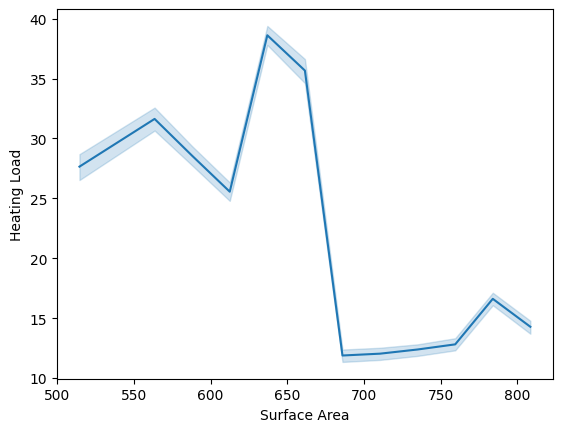

In [101]:
sns.lineplot(data=df, x="Surface Area", y="Heating Load")

In [102]:
np.mean(df,axis=0)

Relative Compactness           0.764167
Surface Area                 671.708333
Wall Area                    318.500000
Roof Area                    176.604167
Overall Height                 5.250000
Orientation                    3.500000
Glazing Area                   0.234375
Glazing Area Distribution      2.812500
Heating Load                  22.307195
Cooling Load                  24.587760
dtype: float64

<AxesSubplot: xlabel='Surface Area', ylabel='Cooling Load'>

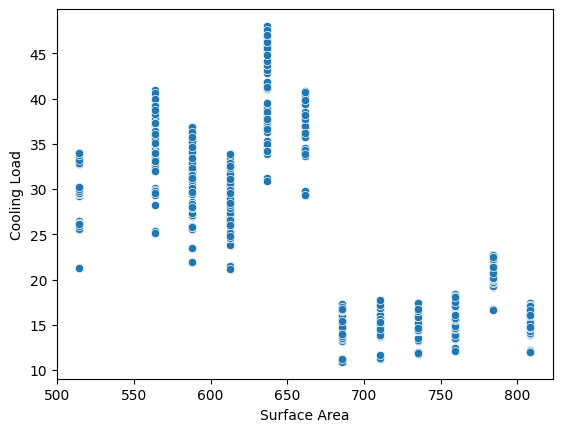

In [103]:
sns.scatterplot(data=df, x="Surface Area", y="Cooling Load")

<AxesSubplot: xlabel='Surface Area', ylabel='Cooling Load'>

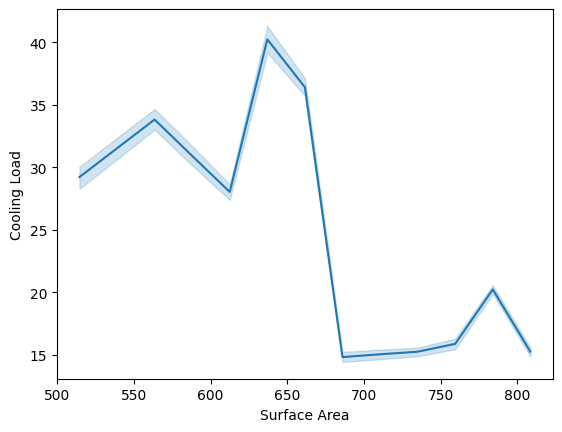

In [104]:
sns.lineplot(data=df, x="Surface Area", y="Cooling Load")

# Conclusion:It can be observed that when the Surface area is high Heating and Cooling Load is less than 20.It means that building having high surface area is more energy efficient.

# 3.Wall Area====>

<AxesSubplot: xlabel='Wall Area', ylabel='Heating Load'>

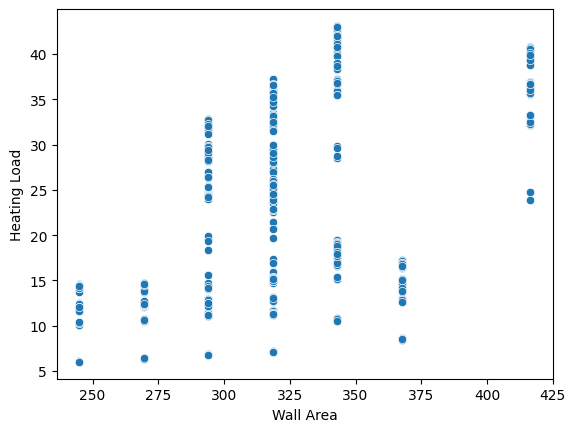

In [105]:
sns.scatterplot(data=df, x="Wall Area", y="Heating Load")

<AxesSubplot: xlabel='Wall Area', ylabel='Heating Load'>

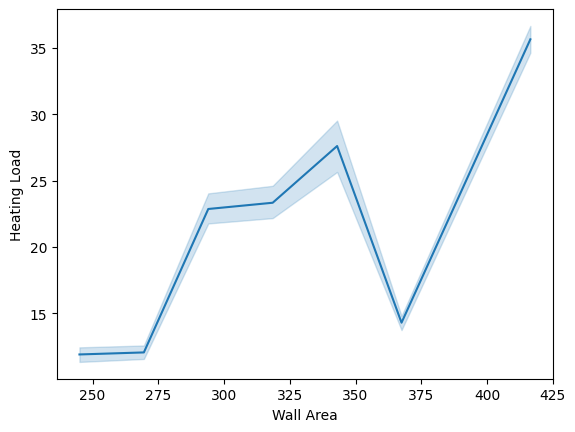

In [106]:
sns.lineplot(data=df, x="Wall Area", y="Heating Load")

<AxesSubplot: xlabel='Wall Area', ylabel='Cooling Load'>

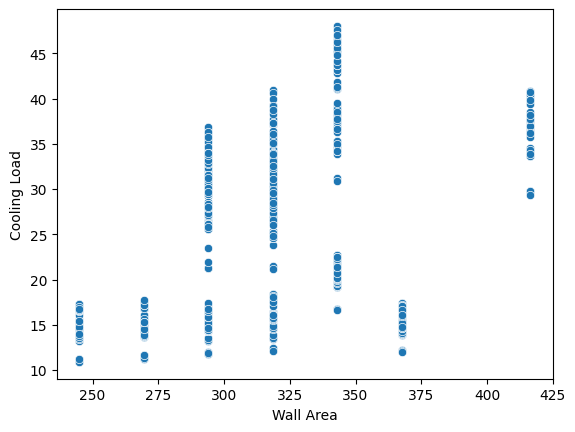

In [107]:
sns.scatterplot(data=df, x="Wall Area", y="Cooling Load")

<AxesSubplot: xlabel='Wall Area', ylabel='Cooling Load'>

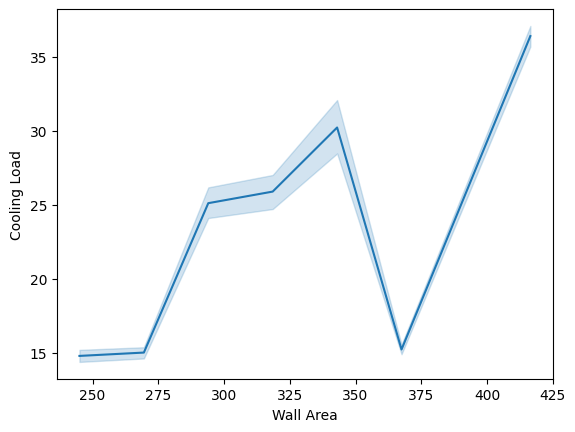

In [108]:
sns.lineplot(data=df, x="Wall Area", y="Cooling Load")

# Conclusion: It can be observed from plot that if the wall area of building is below 275 heating and cooling load is less.It can be because of the fact that less surface of wall would exposure to the sun.

# Roof Area====>

<AxesSubplot: xlabel='Roof Area', ylabel='Heating Load'>

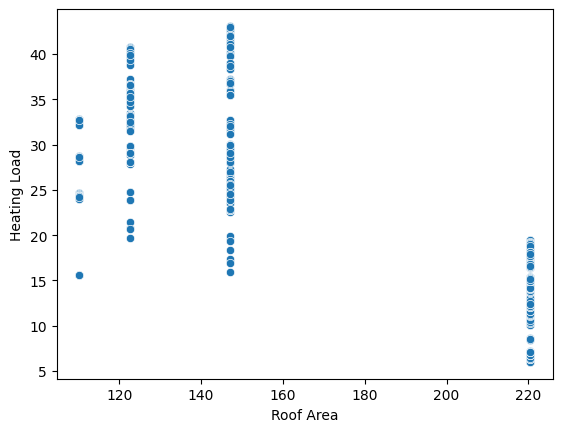

In [109]:
sns.scatterplot(data=df, x="Roof Area", y="Heating Load")

<AxesSubplot: xlabel='Roof Area', ylabel='Heating Load'>

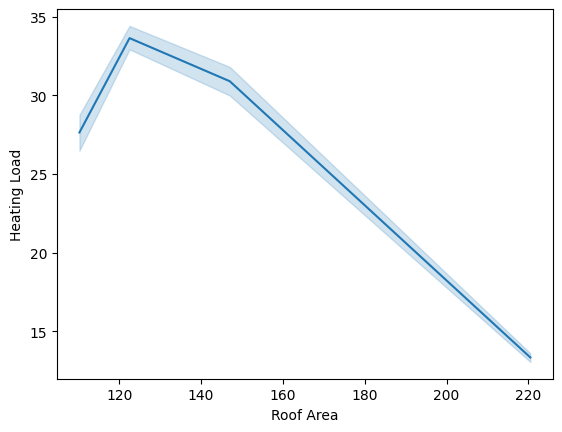

In [110]:
sns.lineplot(data=df, x="Roof Area", y="Heating Load")

<AxesSubplot: xlabel='Roof Area', ylabel='Cooling Load'>

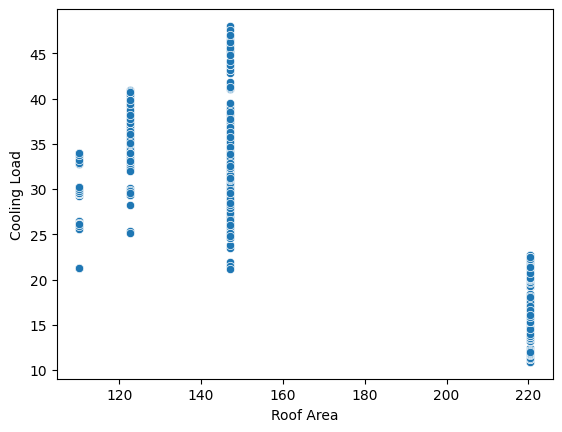

In [111]:
sns.scatterplot(data=df, x="Roof Area", y="Cooling Load")

<AxesSubplot: xlabel='Roof Area', ylabel='Cooling Load'>

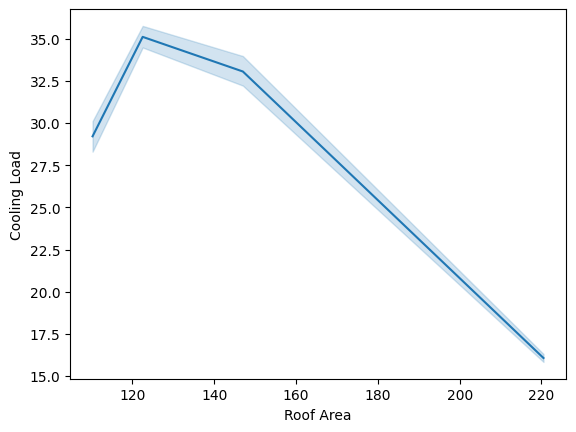

In [112]:
sns.lineplot(data=df, x="Roof Area", y="Cooling Load")

# Conclusion:Roof Area above 220 are more energy efficient

# Overall Height====>

<AxesSubplot: xlabel='Overall Height', ylabel='Cooling Load'>

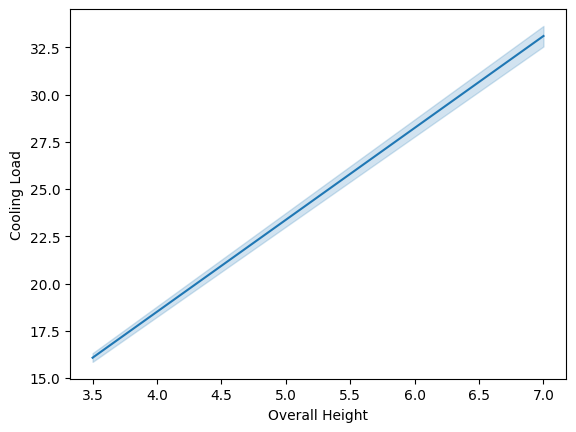

In [113]:
sns.lineplot(data=df, x="Overall Height", y="Cooling Load")

<AxesSubplot: xlabel='Overall Height', ylabel='Heating Load'>

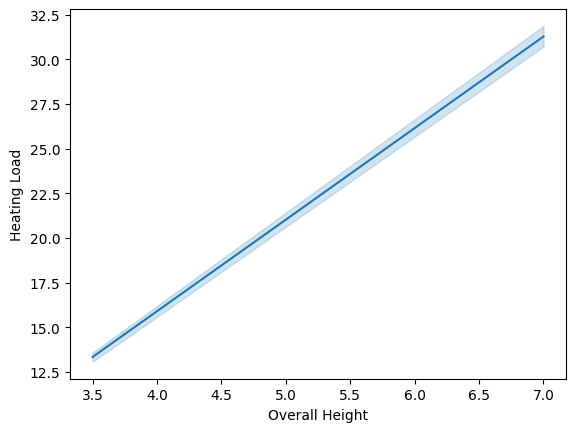

In [114]:
sns.lineplot(data=df, x="Overall Height", y="Heating Load")

# Conclusion:Easily it can be seen that heating and cooling load increases as overall height increases.

# Orientation====>

<AxesSubplot: xlabel='Orientation', ylabel='Heating Load'>

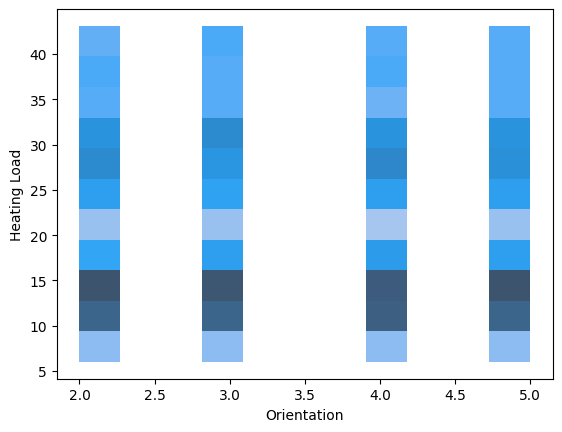

In [115]:
sns.histplot(data=df, x="Orientation", y="Heating Load")

<AxesSubplot: xlabel='Orientation', ylabel='Cooling Load'>

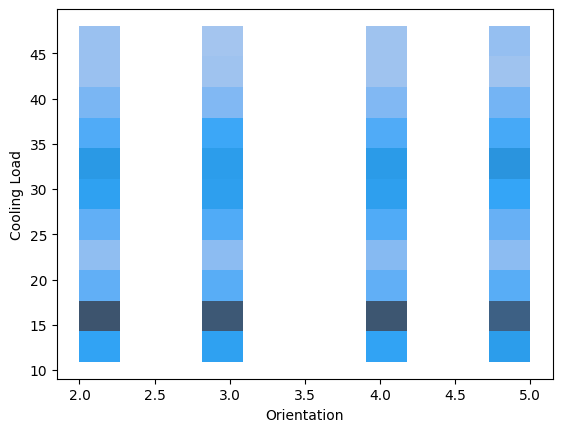

In [116]:
sns.histplot(data=df, x="Orientation", y="Cooling Load")

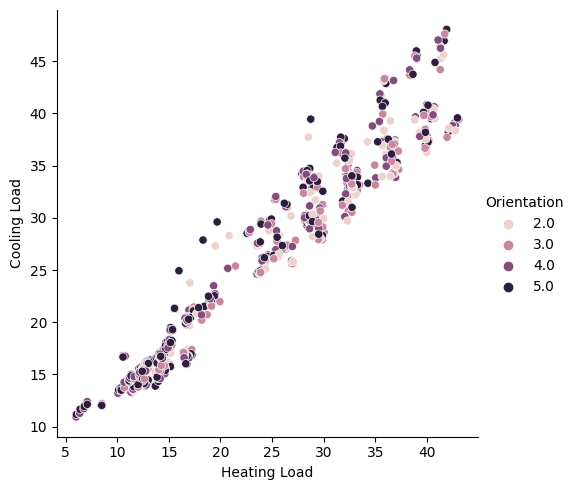

In [117]:
sns.relplot(data=df, x="Heating Load", y="Cooling Load", hue="Orientation")

# Orientation may represent north facing,south facing,east facing,north facing.Different Orientation has different cooling and heating load.Cooling load is less for 3 and 4.Heating load is less for 4 and 5.

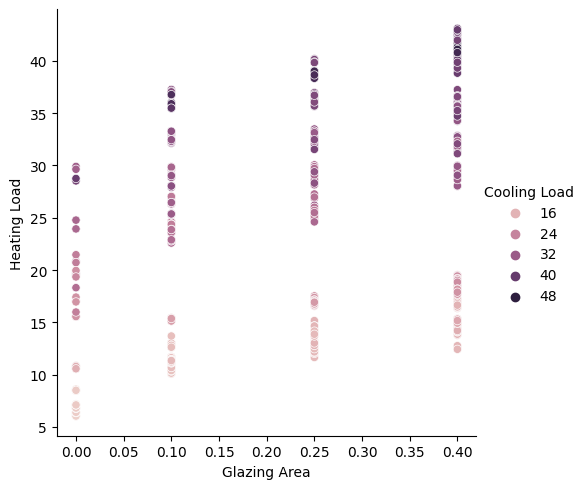

In [118]:
sns.relplot(
    data=df,
    x="Glazing Area", y="Heating Load", hue="Cooling Load", 
)

# Conclusion: Building have higher glazing area have higher load when glazing are is less building is more energy efficient

# Glazing Area Distribution====>

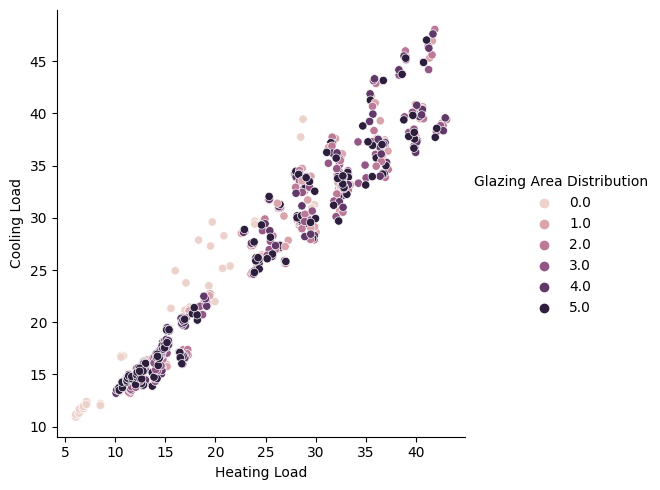

In [119]:
sns.relplot(data=df, x="Heating Load", y="Cooling Load", hue="Glazing Area Distribution")


# Conclusion:Heating and Cooling load increases as Glazing Area Distribution increases.

C:\Users\Vision\AppData\Local\Temp\ipykernel_14628\4063413612.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=df[numerical_columns[i]],shade=True, color='r')
C:\Users\Vision\AppData\Local\Temp\ipykernel_14628\4063413612.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=df[numerical_columns[i]],shade=True, color='r')
C:\Users\Vision\AppData\Local\Temp\ipykernel_14628\4063413612.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=df[numerical_columns[i]],shade=True, color='r')
C:\Users\Vision\AppData\Local\Temp\ipykernel_14628\4063413612.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setti

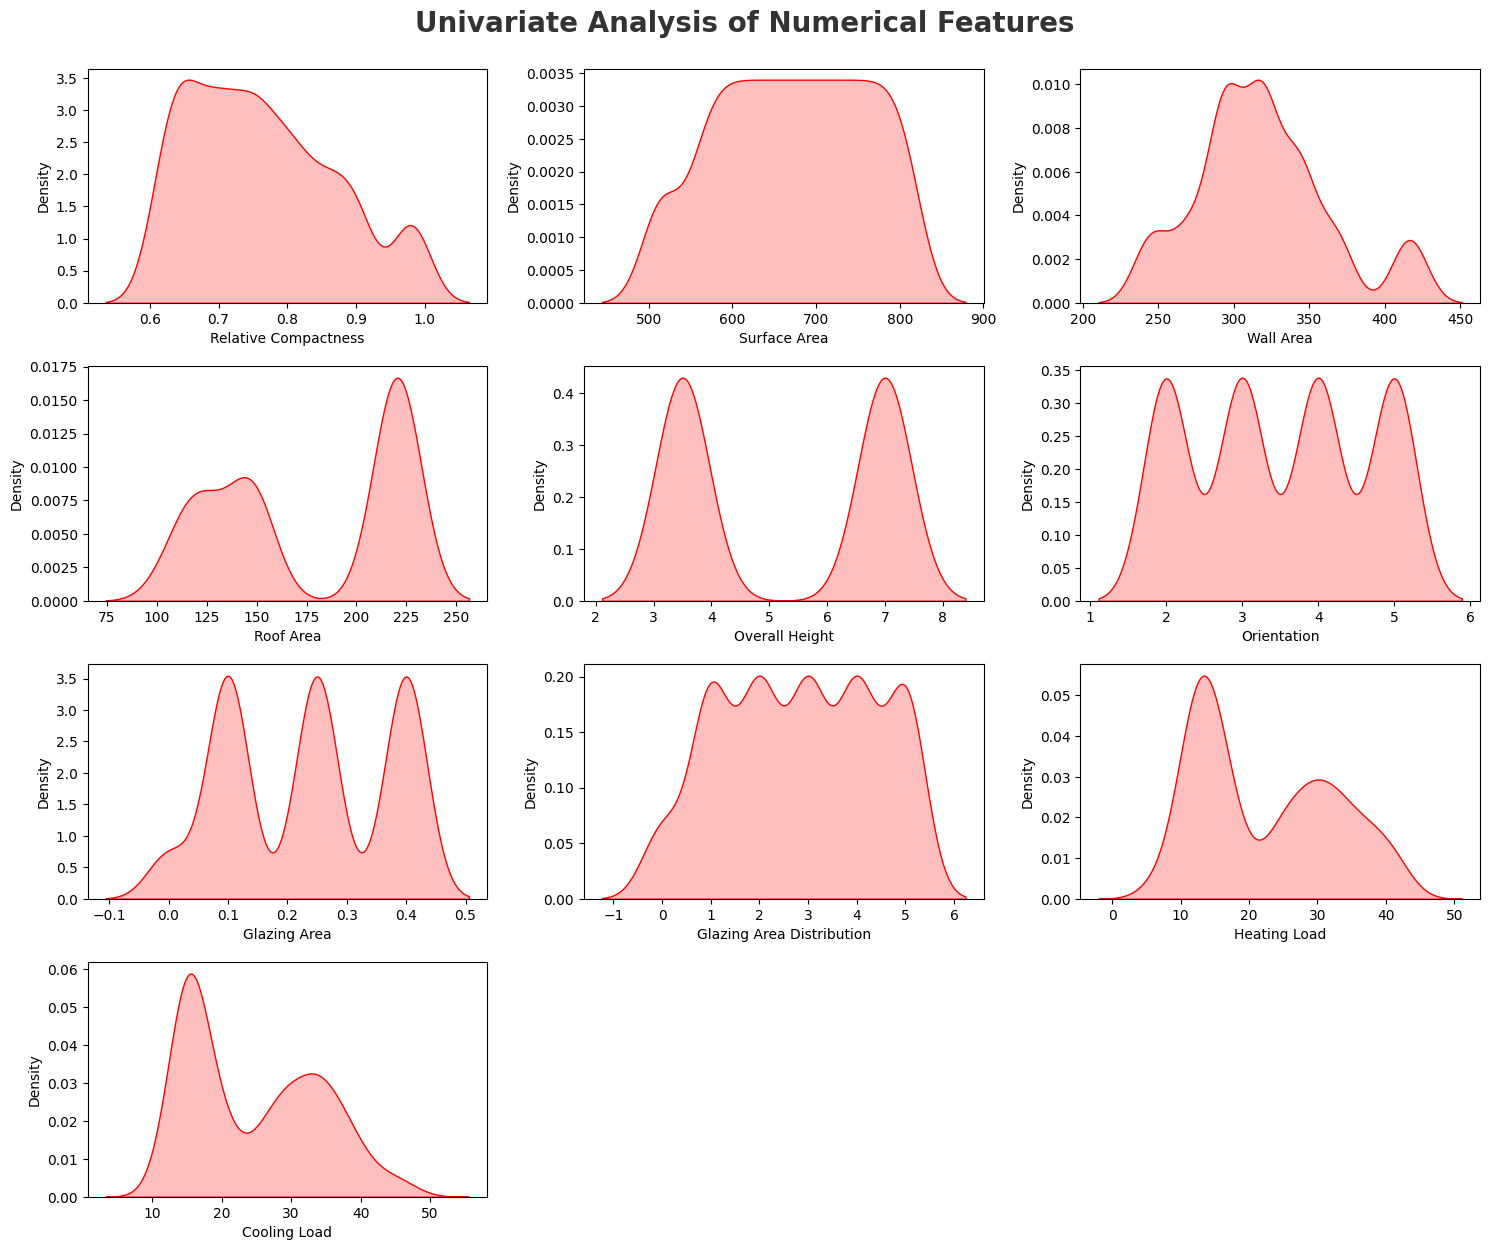

In [120]:
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold',
alpha=0.8, y=1.)
for i in range(0, len(numerical_columns)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df[numerical_columns[i]],shade=True, color='r')
    plt.xlabel(numerical_columns[i])
    plt.tight_layout()

<AxesSubplot: >

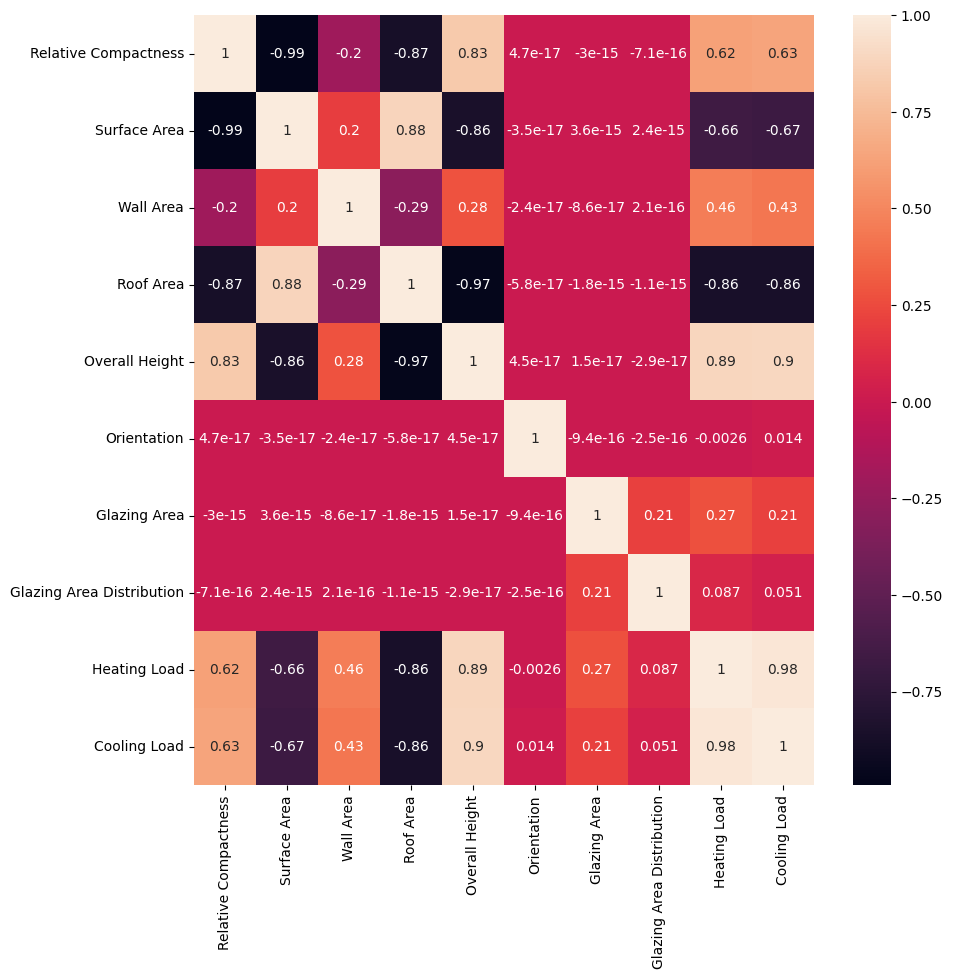

In [121]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(numeric_only=True),annot=True)


# Heating and Cooling load have high correlation to Roof area and overall height.

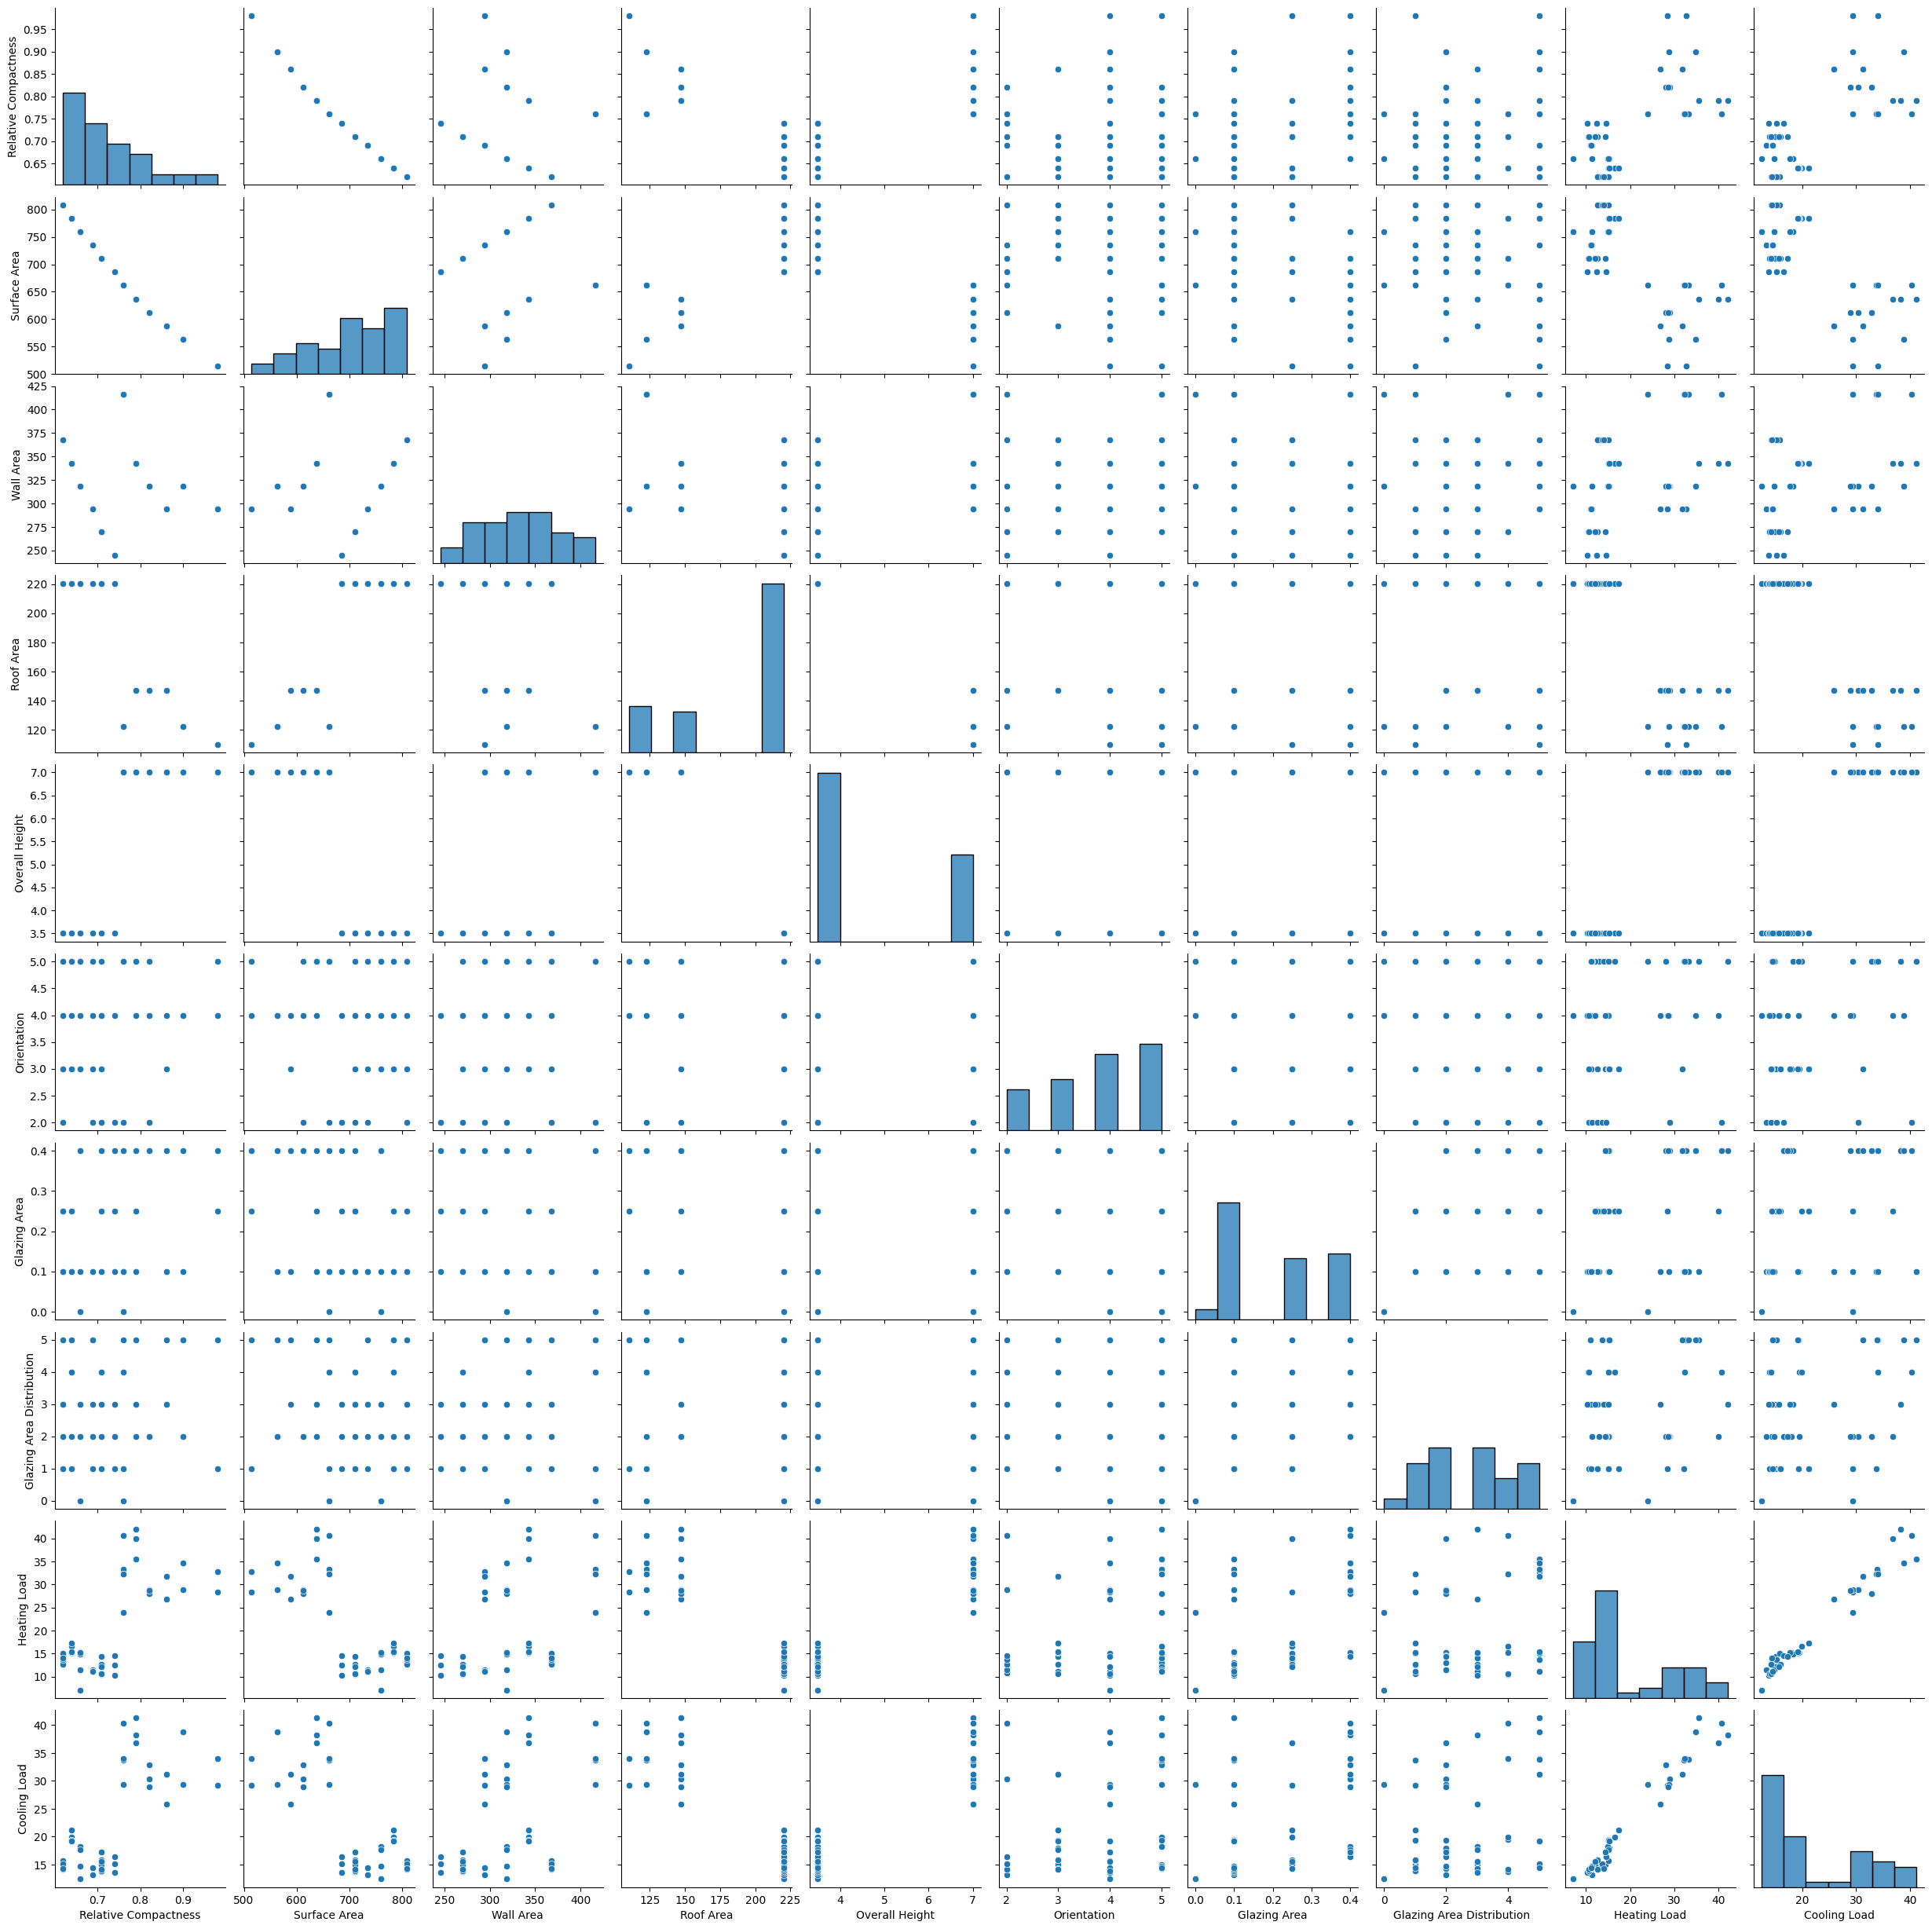

In [122]:
sns.pairplot(df.sample(50))

# It is clearly evident that the Load efficiency is influenced by the Wall Area, Roof Area, Glazing Area.When the Glazing Area is high, Roof Area is high and Wall Area is high, Load will be high and viceversa.